# Knapsack (Genetic Algorithm)

In [1]:
from Genetic_Algorithm import *

---

<h3>I. Input Problem</h3>

---

In [2]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 4, Value = 2
Vật phẩm 2: Weight = 2, Value = 4
Vật phẩm 3: Weight = 5, Value = 6
Vật phẩm 4: Weight = 9, Value = 9
Vật phẩm 5: Weight = 10, Value = 7
Vật phẩm 6: Weight = 14, Value = 11
Vật phẩm 7: Weight = 16, Value = 12
Vật phẩm 8: Weight = 18, Value = 4

Maximum capacity = 25


--- 

<h3>II. Solution</h3>

---

In [12]:
best_solution, best_value = genetic_algorithm()
print("Best solution:", best_solution)
print("Best value:", best_value)

Best solution: [0, 1, 0, 1, 0, 1, 0, 0]
Best value: 24


---

<h3>III. Biểu diễn biểu đồ hội tụ qua các thế hệ</h3>

---

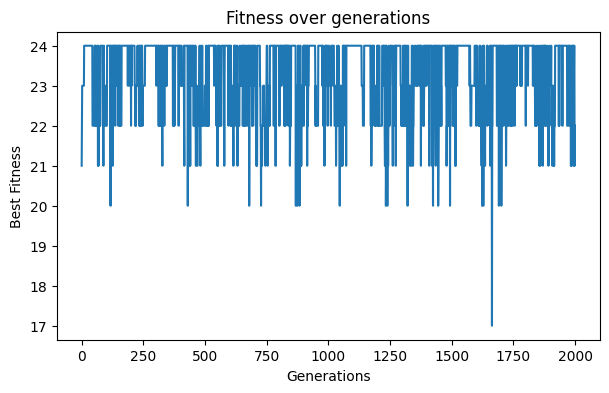

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(fitness_history)
plt.title('Fitness over generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()
